In [143]:
import requests 
import zipfile
import pandas as pd 
import geopandas as gpd 
import io
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## 1/ Import the Livelihood zones data 

In [99]:
url = "https://shapefiles.fews.net/LHZ/FEWS_NET_LH_World.zip"
response = requests.get(url)
response.raise_for_status()  # vérifie que le téléchargement marche

In [100]:
geo = gpd.read_file("../Dataset creation - NASA Nigeria/gadm41_NGA_2.json")

In [101]:
geo.columns #To check that the column containing spatial data is called geometry 

Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'geometry'],
      dtype='object')

In [102]:
print(geo.crs)

EPSG:4326


In [103]:
utm_crs = geo.estimate_utm_crs()
adm2_proj = geo.to_crs(utm_crs)
geo["area_km2"] = adm2_proj.area / 1_000_000
geo[["NAME_2", "area_km2"]].head(28)


,NAME_2,area_km2
0,AbaNorth,17.949055
1,AbaSouth,50.713883
2,Arochukwu,384.316248
3,Bende,601.199128
4,Ikwuano,237.054741
5,IsialaNgwaNorth,253.026794
6,IsialaNgwaSouth,260.071422
7,Isuikwuato,335.434453
8,ObiNgwa,373.345840
9,Ohafia,565.989625


In [104]:
geo["area_km2"].sum() #Check if we have the correct area for Nigeria 

np.float64(910157.2711641813)

In [105]:
geo.head()

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,area_km2
0,NGA.1.1_1,NGA,Nigeria,NGA.1_1,Abia,NA,AbaNorth,NA,NA,LocalAuthority,LocalAuthority,NA,NA,"MULTIPOLYGON (((7.3781 5.057, 7.369 5.057, 7.3...",17.949055
1,NGA.1.2_1,NGA,Nigeria,NGA.1_1,Abia,NA,AbaSouth,NA,NA,LocalAuthority,LocalAuthority,NA,NA,"MULTIPOLYGON (((7.3148 5.088, 7.3223 5.0874, 7...",50.713883
2,NGA.1.3_1,NGA,Nigeria,NGA.1_1,Abia,NA,Arochukwu,NA,NA,LocalAuthority,LocalAuthority,NA,NA,"MULTIPOLYGON (((7.6415 5.5134, 7.6341 5.5256, ...",384.316248
3,NGA.1.4_1,NGA,Nigeria,NGA.1_1,Abia,NA,Bende,NA,NA,LocalAuthority,LocalAuthority,NA,NA,"MULTIPOLYGON (((7.635 5.6413, 7.6352 5.636, 7....",601.199128
4,NGA.1.5_1,NGA,Nigeria,NGA.1_1,Abia,NA,Ikwuano,NA,NA,LocalAuthority,LocalAuthority,NA,NA,"MULTIPOLYGON (((7.5481 5.4872, 7.5728 5.4718, ...",237.054741


In [106]:
#Load Livelihood Zones data frame 
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

#Save into a temporary file 
extract_path = "lhz_temp"
zip_file.extractall(extract_path)

all_files = []
for root, dirs, files in os.walk(extract_path):
    for f in files:
        full_path = os.path.join(root, f)
        all_files.append(full_path)

print("Fichiers extraits :")
for f in all_files:
    print(f)


Fichiers extraits :
lhz_temp/FEWS_NET_LH_World_Livelihood Zone.shx
lhz_temp/FEWS_NET_LH_World_Livelihood Zone.cpg
lhz_temp/FEWS_NET_LH_World_Livelihood Zone.shp
lhz_temp/FEWS_NET_LH_World_Livelihood Zone.dbf


In [107]:
lhz_gdf = gpd.read_file("lhz_temp/FEWS_NET_LH_World_Livelihood Zone.shp")

In [108]:
print(lhz_gdf.crs)


None


In [109]:
lhz_gdf.set_crs(epsg=4326, inplace=True)

,unit_type,country,admin_0,admin_1,admin_2,admin_3,layer_id,layer_name,FNID,CLASS,...,ADMIN1,LZTYPE,MAINCROPS,MAINLSTOCK,SHAPE_LE_1,Shape_Ar_1,Shape_Le_2,ALIASES,LZSZCODE,geometry
0,Livelihood Zone,Chad,None,None,None,None,4590,TD_LHZ_2021,TD2021L109,SH01,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((16.8155 23.07526, 16.82722 23.068, 1..."
1,Livelihood Zone,Chad,None,None,None,None,4590,TD_LHZ_2021,TD2021L106,AG10,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((22.94006 15.10751, 22.92099 15.09343..."
2,Livelihood Zone,Chad,None,None,None,None,4590,TD_LHZ_2021,TD2021L108,FS01,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((13.7299 14.51182, 13.74198 14.49744,..."
3,Livelihood Zone,Chad,None,None,None,None,4590,TD_LHZ_2021,TD2021L101,AG02,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((15.37275 9.95784, 15.39328 9.94884, ..."
4,Livelihood Zone,Chad,None,None,None,None,4590,TD_LHZ_2021,TD2021L103,AN04,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((19.40499 11.104, 19.479 11.04799, 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Livelihood Zone,Mozambique,None,None,None,None,4953,MZ_LHZ_2013,MZ2013L117,AG08,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((34.91887 -17.41312, 34.91884 -17.413..."
879,Livelihood Zone,Mozambique,None,None,None,None,4953,MZ_LHZ_2013,MZ2013L118,AS08,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((35.89184 -18.94383, 35.89166 -18.944..."
880,Livelihood Zone,Mozambique,None,None,None,None,4953,MZ_LHZ_2013,MZ2013L119,AG12,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"MULTIPOLYGON (((33.90401 -19.59824, 33.90402 -..."
881,Livelihood Zone,Mozambique,None,None,None,None,4953,MZ_LHZ_2013,MZ2013L120,AS10,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"MULTIPOLYGON (((34.66565 -24.79688, 34.66567 -..."


In [110]:
#We check the crs 
lhz_gdf = lhz_gdf.to_crs(epsg=4326)
geo = geo.to_crs(epsg=4326)


In [111]:
lhz_gdf.columns

Index(['unit_type', 'country', 'admin_0', 'admin_1', 'admin_2', 'admin_3',
       'layer_id', 'layer_name', 'FNID', 'CLASS', 'LZNUM', 'LZCODE',
       'COUNTRY_1', 'EFF_YEAR', 'LZNAMEEN', 'LZNAMEFR', 'LZNAMEPT', 'LZNAMESP',
       'SHAPE_AREA', 'SHAPE_LENG', 'ADMIN0', 'ADMIN0FR', 'ADMIN0SP', 'BSS',
       'VALUE', 'ADMIN1', 'LZTYPE', 'MAINCROPS', 'MAINLSTOCK', 'SHAPE_LE_1',
       'Shape_Ar_1', 'Shape_Le_2', 'ALIASES', 'LZSZCODE', 'geometry'],
      dtype='object')

In [112]:
lhz_gdf['country'].unique()

array(['Chad', 'Mali', 'Congo, The Democratic Republic of the',
       'Ethiopia', 'Tanzania, United Republic of', 'Senegal', 'Sudan',
       'Burundi', 'Angola', 'Haiti', 'Central African Republic', 'Uganda',
       'Rwanda', 'Guinea', 'Cameroon', 'Burkina Faso', 'Guatemala',
       'Zimbabwe', 'Kenya', 'Lesotho', 'Honduras', 'Liberia',
       'Madagascar', 'Mauritania', 'Malawi', 'Nicaragua', 'Sierra Leone',
       'Somalia', 'South Sudan', 'Tajikistan', 'Niger', 'Yemen', 'Zambia',
       'Afghanistan', 'El Salvador', 'Nigeria', 'Djibouti', 'Mozambique'],
      dtype=object)

In [113]:
lhz_gdf_ng = lhz_gdf[lhz_gdf['country']== 'Nigeria']

In [114]:
lhz_gdf_ng.head()

,unit_type,country,admin_0,admin_1,admin_2,admin_3,layer_id,layer_name,FNID,CLASS,...,ADMIN1,LZTYPE,MAINCROPS,MAINLSTOCK,SHAPE_LE_1,Shape_Ar_1,Shape_Le_2,ALIASES,LZSZCODE,geometry
774,Livelihood Zone,Nigeria,None,None,None,None,4589,NG_LHZ_2018,NG2018L133,AS16,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"MULTIPOLYGON (((7.49347 4.55986, 7.49347 4.559..."
775,Livelihood Zone,Nigeria,None,None,None,None,4589,NG_LHZ_2018,NG2018L131,FS07,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((3.26599 6.70696, 3.26787 6.70693, 3...."
777,Livelihood Zone,Nigeria,None,None,None,None,4589,NG_LHZ_2018,NG2018L130,AN14,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"MULTIPOLYGON (((7.66015 6.8519, 7.65605 6.8393..."
778,Livelihood Zone,Nigeria,None,None,None,None,4589,NG_LHZ_2018,NG2018L129,AN13,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"POLYGON ((3.12325 7.3955, 3.12626 7.38991, 3.1..."
779,Livelihood Zone,Nigeria,None,None,None,None,4589,NG_LHZ_2018,NG2018L128,AS07,...,None,None,None,None,NaN,NaN,NaN,NaN,None,"MULTIPOLYGON (((4.93298 7.85709, 4.93771 7.854..."


<Axes: >

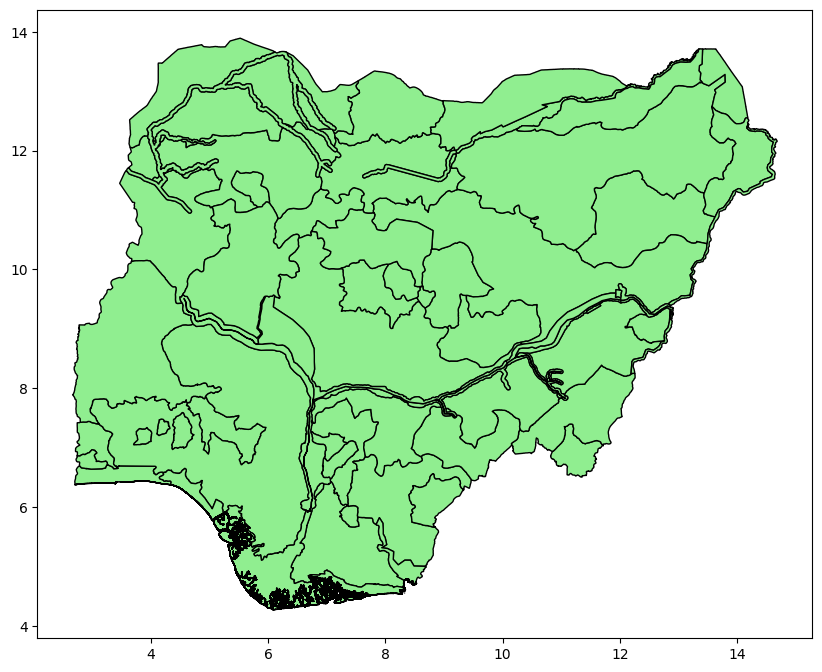

In [115]:
lhz_gdf_ng.plot(figsize=(10, 10), edgecolor='black', color='lightgreen') ##Check the data 

# 2/ Compute the areas for the admin 2 in order to intersect with Livelihood zones

In [126]:
#Compute the area for each admin 2 
geo["adm2_area"] = geo.geometry.to_crs(epsg=32632).area

In [127]:
#Determine the intersection using the area 
intersection = gpd.overlay(geo, lhz_gdf_ng, how="intersection")

utm_crs = intersection.estimate_utm_crs()  # projection métrique adaptée
intersection['intersect_area'] = intersection.to_crs(utm_crs).area

# Merge avec l'aire totale des ADM2
intersection = intersection.merge(
    geo[['NAME_2', 'adm2_area']],
    left_on='NAME_2',
    right_on='NAME_2',
    how='left'
)

print(intersection.columns)


Index(['GID_2', 'GID_0', 'COUNTRY', 'GID_1', 'NAME_1', 'NL_NAME_1', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'TYPE_2', 'ENGTYPE_2', 'CC_2', 'HASC_2',
       'area_km2', 'adm2_area_x', 'unit_type', 'country', 'admin_0', 'admin_1',
       'admin_2', 'admin_3', 'layer_id', 'layer_name', 'FNID', 'CLASS',
       'LZNUM', 'LZCODE', 'COUNTRY_1', 'EFF_YEAR', 'LZNAMEEN', 'LZNAMEFR',
       'LZNAMEPT', 'LZNAMESP', 'SHAPE_AREA', 'SHAPE_LENG', 'ADMIN0',
       'ADMIN0FR', 'ADMIN0SP', 'BSS', 'VALUE', 'ADMIN1', 'LZTYPE', 'MAINCROPS',
       'MAINLSTOCK', 'SHAPE_LE_1', 'Shape_Ar_1', 'Shape_Le_2', 'ALIASES',
       'LZSZCODE', 'geometry', 'intersect_area', 'adm2_area_y'],
      dtype='object')


In [130]:
intersection["pct_overlap"] = (intersection["intersect_area"] / intersection["adm2_area_x"]) * 100

In [131]:
lhz_df = intersection.groupby(
    ["NAME_2", "LZCODE", "LZNAMEEN"]
)["pct_overlap"].sum().reset_index()

In [132]:
lhz_df["pct_overlap"] = lhz_df["pct_overlap"] / lhz_df.groupby("NAME_2")["pct_overlap"].transform("sum")*100

# 3/ Plot the data

/var/folders/cd/vx4tz04x1zd9kslwkhpqww3m0000gn/T/ipykernel_81659/1349840275.py:22: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
/var/folders/cd/vx4tz04x1zd9kslwkhpqww3m0000gn/T/ipykernel_81659/1349840275.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


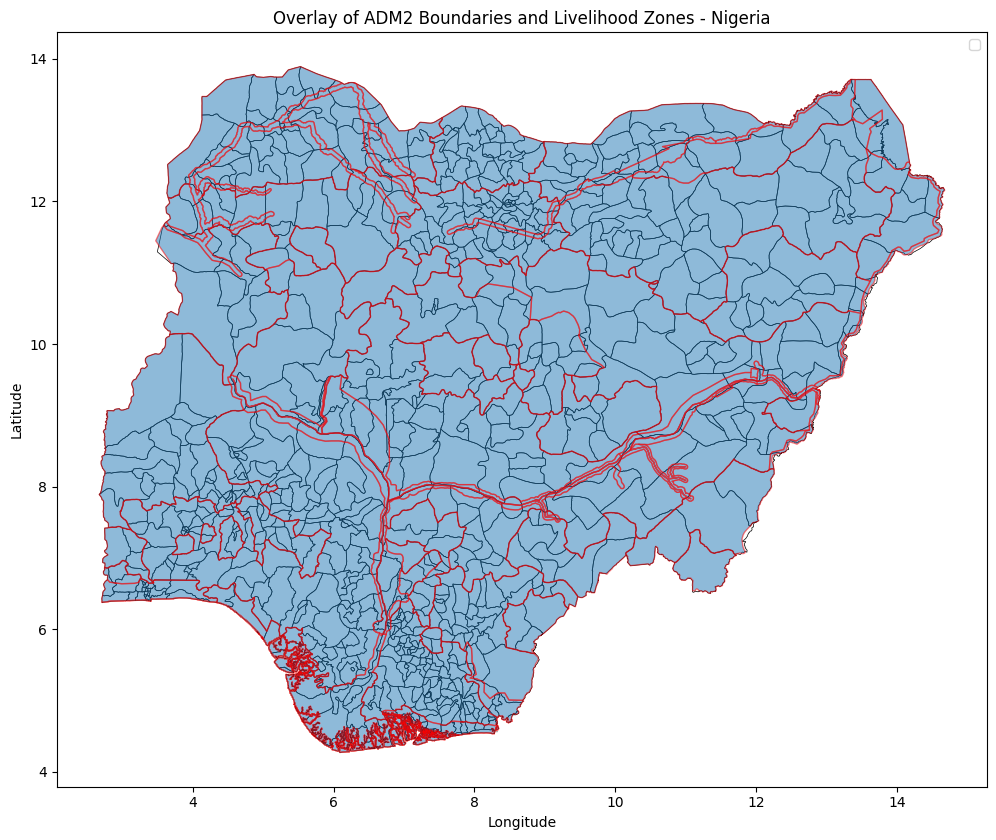

In [133]:

fig, ax = plt.subplots(figsize=(12, 10))

# ADM2 boundaries
geo.plot(
    ax=ax,
    facecolor='none',     
    edgecolor='black',
    linewidth=0.5,
    label='ADM2'
)

# Livelihood Zones
lhz_gdf_ng.plot(
    ax=ax,
    alpha=0.5,
    edgecolor='red',
    label='Livelihood Zones'
)

plt.legend()
plt.title("Overlay of ADM2 Boundaries and Livelihood Zones - Nigeria")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

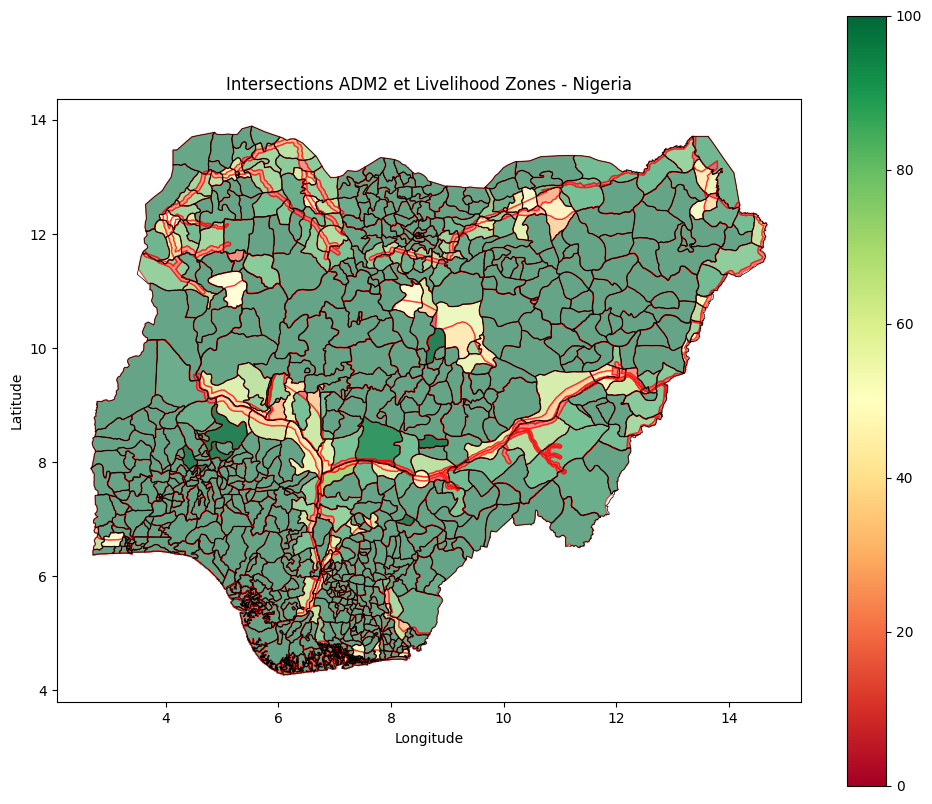

In [144]:

fig, ax = plt.subplots(figsize=(12, 10))

#Définition de la color map 
# Définir un colormap rouge → vert
cmap = plt.cm.RdYlGn  # Red → Yellow → Green
# Normaliser les valeurs pour le colormap (0 à 100%)
norm = mcolors.Normalize(vmin=0, vmax=100)


# ADM2 boundaries
geo.boundary.plot(ax=ax, color='black', linewidth=0.5, label='ADM2')

# Intersections
intersection.plot(
    ax=ax,
    column='pct_overlap',   # ou 'LZCODE' pour couleur par zone
    cmap = cmap,
    norm = norm,
    edgecolor='red',
    legend=True,
    alpha=0.6
)

plt.title("Intersections ADM2 et Livelihood Zones - Nigeria")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# 4/ Ajout des CSV 

In [152]:
# Convertir la géométrie en WKT pour export CSV
gdf_ng_export = gdf_ng.copy()
gdf_ng_export["geometry"] = gdf_ng_export["geometry"].apply(lambda x: x.wkt)

# Exporter en CSV
gdf_ng_export.to_csv("LHZ_NG.csv", index=False)


/var/folders/cd/vx4tz04x1zd9kslwkhpqww3m0000gn/T/ipykernel_81659/2830471129.py:3: UserWarning: Geometry column does not contain geometry.
  gdf_ng_export["geometry"] = gdf_ng_export["geometry"].apply(lambda x: x.wkt)


In [153]:
# Créer une copie pour l'export
intersection_export = intersection.copy()
intersection_export.to_csv("LHZ_admin2_intersection.csv", index=False)
